In [ ]:
#extract th e zip folder
!unzip "/content/drive/MyDrive/ECG-Dataset.zip" -d "/content/drive/MyDrive/ECG-Dataset"


Archive:  /content/drive/MyDrive/ECG-Dataset.zip
replace /content/drive/MyDrive/ECG-Dataset/Dataset/test/Left Bundle Branch Block/fig_5897.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#import the nueral network libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
#import the cnn layers
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

#image preprocessing (or) data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train =train_datagen.flow_from_directory("/content/drive/MyDrive/ECG-Dataset/Dataset/train",target_size=(64,64),batch_size=32,class_mode="categorical")


Found 15341 images belonging to 6 classes.


In [ ]:
x_test = test_datagen.flow_from_directory("/content/drive/MyDrive/ECG-Dataset/Dataset/test",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 6825 images belonging to 6 classes.


In [ ]:
x_train.class_indices

{'Left Bundle Branch Block': 0,
 'Normal': 1,
 'Premature Atrial Contraction': 2,
 'Premature Ventricular Contractions': 3,
 'Right Bundle Branch Block': 4,
 'Ventricular Fibrillation': 5}

In [ ]:
#initialize the model
model=Sequential()

In [ ]:
#convolutional model
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))
#here 32 indiates no.of feature detectors and(3,3) is feature detector size

In [ ]:
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#flatten layer
model.add(Flatten())

#hidden layers

In [ ]:
model.add(Dense(units=200,activation="relu",kernel_initializer="random_uniform"))

In [ ]:
model.add(Dense(units=300,activation="relu",kernel_initializer="random_uniform"))

#output layer


In [ ]:
model.add(Dense(units=6,activation="softmax",kernel_initializer="random_uniform"))

#compile model

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

#train your  model

In [ ]:
tr=model.fit_generator(x_train,steps_per_epoch=480,epochs=25,validation_data=x_test,validation_steps=10)
#steps_per_epoch =>total trainging images/batch size
#validation_steps=>total testing images/batch size

Epoch 1/25


<ipython-input-29-85df04309dce>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  tr=model.fit_generator(x_train,steps_per_epoch=480,epochs=25,validation_data=x_test,validation_steps=10)


480/480 [==============================] - 139s 290ms/step - loss: 0.1375 - accuracy: 0.9570 - val_loss: 0.4658 - val_accuracy: 0.8344
Epoch 2/25
480/480 [==============================] - 135s 280ms/step - loss: 0.1019 - accuracy: 0.9696 - val_loss: 0.5208 - val_accuracy: 0.8656
Epoch 3/25
480/480 [==============================] - 138s 288ms/step - loss: 0.0817 - accuracy: 0.9740 - val_loss: 0.4992 - val_accuracy: 0.9031
Epoch 4/25
480/480 [==============================] - 137s 285ms/step - loss: 0.0653 - accuracy: 0.9776 - val_loss: 0.6651 - val_accuracy: 0.8719
Epoch 5/25
480/480 [==============================] - 138s 286ms/step - loss: 0.0542 - accuracy: 0.9817 - val_loss: 1.0073 - val_accuracy: 0.8375
Epoch 6/25
480/480 [==============================] - 139s 289ms/step - loss: 0.0553 - accuracy: 0.9817 - val_loss: 0.9780 - val_accuracy: 0.8344
Epoch 7/25
480/480 [==============================] - 136s 284ms/step - loss: 0.0415 - accuracy: 0.9860 - val_loss: 0.9159 - val_accura

In [ ]:
tr.history

{'loss': [0.13747435808181763,
  0.10193769633769989,
  0.08173473924398422,
  0.0652836412191391,
  0.05415259301662445,
  0.055286068469285965,
  0.04148966073989868,
  0.0398944616317749,
  0.03603905811905861,
  0.028842004016041756,
  0.04344993084669113,
  0.02806287445127964,
  0.023479891940951347,
  0.026659822091460228,
  0.023999808356165886,
  0.022436680272221565,
  0.018494179472327232,
  0.031407490372657776,
  0.01968829520046711,
  0.018452482298016548,
  0.01141885295510292,
  0.014424820430576801,
  0.017308907583355904,
  0.014843597076833248,
  0.013471845537424088],
 'accuracy': [0.9570432305335999,
  0.969623863697052,
  0.9739912748336792,
  0.9775764346122742,
  0.981683075428009,
  0.9817482829093933,
  0.985985279083252,
  0.9867674708366394,
  0.9880712032318115,
  0.9908741116523743,
  0.9865719079971313,
  0.9913304448127747,
  0.9922429919242859,
  0.9912652373313904,
  0.99335116147995,
  0.992634117603302,
  0.9932859539985657,
  0.9900919198989868,
  0

#to save the best accuracy got in the epoch we willn use this callback and checkpoint

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint("best_model_{epoch:02d}.h5",monitor="val_accuracy",save_best_only=True,mode="Max")
tr = model.fit_generator(x_train,steps_per_epoch=480,callbacks=[checkpoint],validation_steps=10)

#saving the model

In [ ]:
#for storing temporary
model.save('ECG.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#for storing permanent in drive
model.save("/content/drive/MyDrive/ECG-Dataset/ECG.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
losses=tr.history['loss']
accuracy=tr.history['accuracy']
epochs=list(range(1,26))


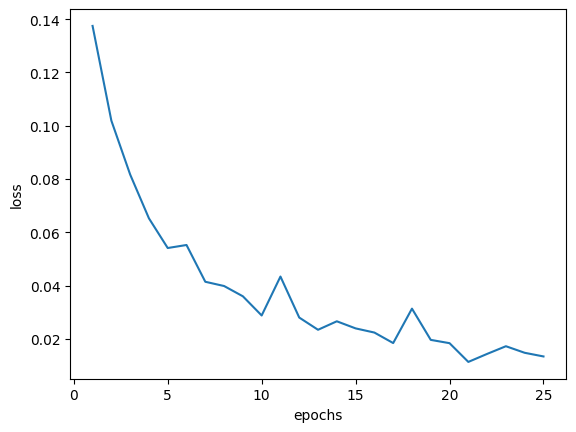

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs,losses)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

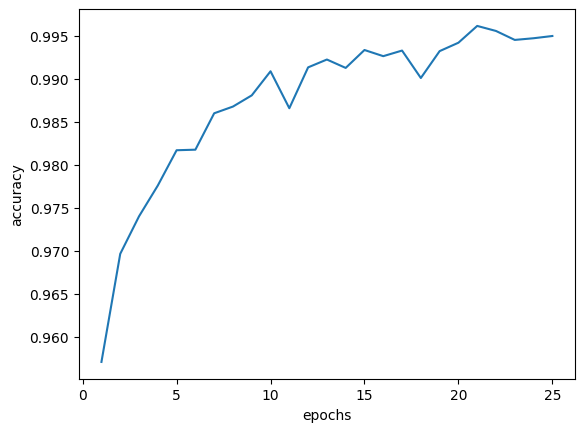

In [ ]:
plt.plot(epochs,accuracy)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [ ]:
losses=tr.history['loss']
accuracy=tr.history['accuracy']
val_accuarcy=tr.history['val_accuracy']
epochs=list(range(1,26))


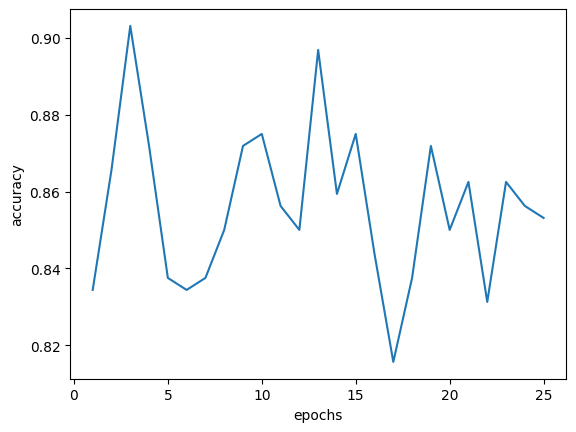

In [ ]:
plt.plot(epochs,val_accuarcy)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()